In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('blendshapes.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,label
0,9.127606e-08,0.016273,0.016038,0.077343,0.194703,0.055925,0.000010,1.629012e-08,3.962332e-08,0.069791,...,0.004688,4.905802e-05,7.912145e-05,0.002280,0.004701,0.000032,0.000112,3.234935e-06,2.881345e-07,sad
1,1.393631e-06,0.000886,0.007994,0.068356,0.673972,0.105411,0.000045,1.027864e-07,1.963303e-07,0.393947,...,0.020451,7.134319e-02,1.908985e-01,0.020274,0.148590,0.000242,0.000606,2.415368e-06,8.760577e-07,sad
2,4.507136e-06,0.144896,0.243685,0.000924,0.091016,0.026172,0.000034,6.645928e-07,7.823285e-07,0.497372,...,0.020200,1.339113e-03,7.144113e-04,0.002716,0.006207,0.000019,0.000006,6.324263e-07,1.459176e-06,sad
3,6.119213e-07,0.002948,0.008550,0.168621,0.367033,0.050400,0.000021,1.798173e-06,1.956369e-07,0.022764,...,0.085159,2.780677e-07,4.612105e-07,0.000089,0.000863,0.000723,0.001514,2.789299e-06,1.741031e-06,sad
4,2.441666e-06,0.223894,0.154553,0.000446,0.017999,0.039317,0.000022,4.769263e-07,1.068603e-06,0.643471,...,0.011830,1.101835e-01,6.295095e-02,0.006459,0.027523,0.000064,0.000035,1.155734e-06,9.290947e-07,sad


In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.001, random_state=42)

In [4]:
clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", svm.SVC(kernel="rbf", C=5, probability=True, verbose=True))
])
clf_rbf.fit(train_data.values, train_labels.values)

[LibSVM]

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, probability=True, verbose=True))])

In [5]:
y_train_pred = cross_val_predict(clf_rbf, train_data, train_labels, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

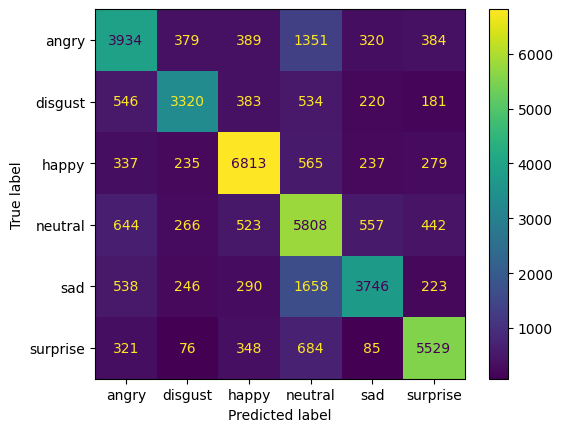

In [6]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=clf_rbf.classes_).plot()

In [7]:
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.6962508709755338
0.6876459625863981
0.6919216646248117


In [8]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=True, n_jobs=-1)
forest_clf.fit(train_data.values, train_labels.values)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=True)

In [9]:
y_train_pred = cross_val_predict(forest_clf, train_data, train_labels, cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n

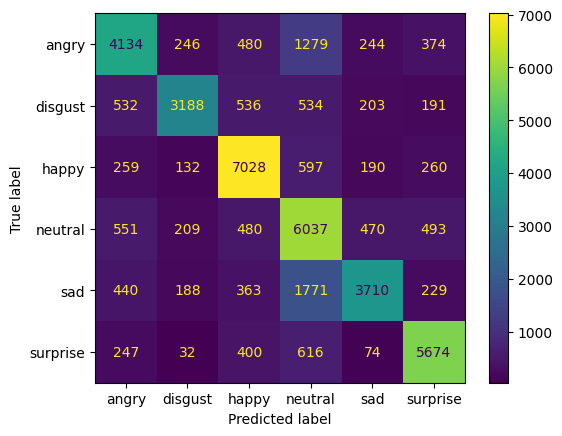

In [10]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=forest_clf.classes_).plot()

In [11]:
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.7144110845394067
0.7022952985303484
0.7083013839506205
